# Notebook d'analyse univariée et multivariée

## 1. l'importation des outils / bibliothéques et de la base de données déja nettoyée


In [2]:
import numpy as np , matplotlib as plt 
%pylab inline
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm

import pandas as pd
%matplotlib inline
import seaborn as sns
from collections import Counter

from sklearn import preprocessing , decomposition , neighbors
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import random

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_c= pd.read_csv('cleaned.csv', sep='\t')

In [4]:
data_c

,Unnamed: 0,product_name,countries,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,15,Tarte noix de coco,France,0.0,d,1594.0,22.00,15.500,27.30,21.900,4.400,4.600,0.100000,0.040000,14.0
1,23,Compote de poire,France,0.0,a,657.0,0.00,0.000,36.00,27.000,3.600,0.600,0.000000,0.000000,-2.0
2,54,BAguette bressan,France,3.0,a,669.0,2.20,0.500,25.20,0.600,1.600,9.500,0.358000,0.143200,-4.0
3,246,Cranberries,United States,0.0,c,1255.0,0.00,0.000,83.33,66.670,10.000,0.000,0.000000,0.000000,3.0
4,292,Blanquette de Volaille et son Riz,France,2.0,b,450.0,2.20,0.900,15.30,0.500,0.500,6.800,0.700000,0.280000,0.0
5,293,Raviolini au Fromage de chèvre et Pesto,France,0.0,b,455.0,4.20,2.100,12.50,1.400,1.800,4.400,0.600000,0.240000,2.0
6,295,Salade Cesar,Canada,3.0,a,1210.0,12.00,7.000,23.00,0.000,2.000,22.000,2.160000,0.000864,-3.0
7,311,Entremets Crème Brulée,France,4.0,b,1952.4,15.30,11.200,75.50,69.800,0.100,6.800,0.500000,0.200000,2.0
8,325,Chaussons tressés aux pommes,Canada,3.0,c,1090.0,10.70,2.000,38.70,24.700,2.000,3.330,0.647000,0.000259,5.0
9,341,Pain Burger Artisan,Canada,0.0,a,1160.0,1.11,0.333,53.30,1.110,2.220,10.000,1.520000,0.000610,-4.0


## 2. L'analyse Univariée

In [5]:
data_c.columns

Index(['Unnamed: 0', 'product_name', 'countries', 'additives_n',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [6]:
def boxplot_univ (feature,plotColor="#CC9900"):
    sns.set_style("whitegrid")

    plt.figure(figsize=(8,3)) 
    
    sns.boxplot(data=data_c, y=feature)

(0, 10)

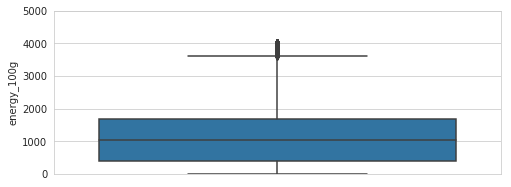

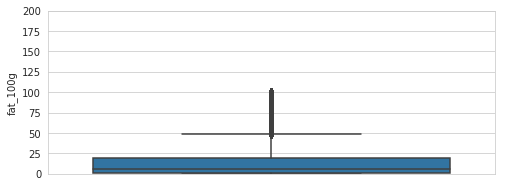

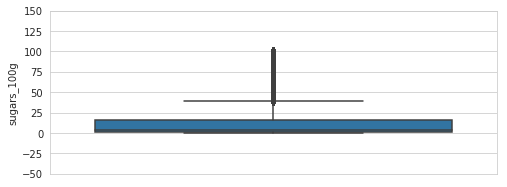

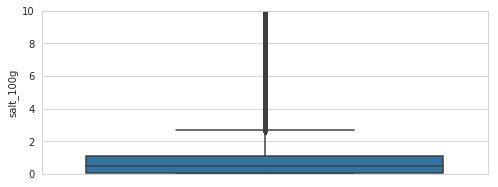

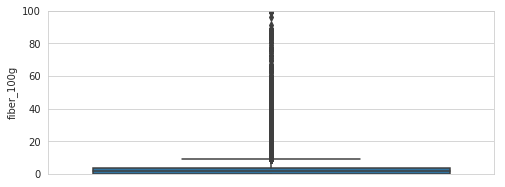

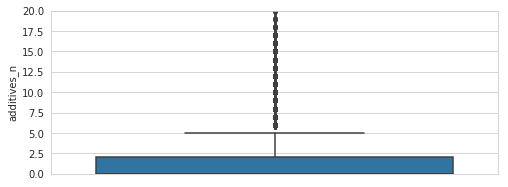

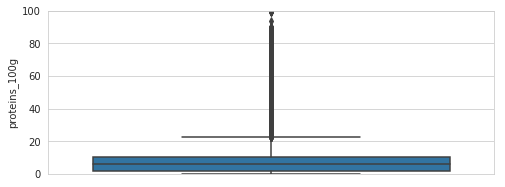

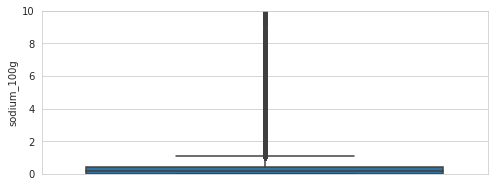

In [7]:
boxplot_univ("energy_100g")
plt.ylim(0, 5000)

boxplot_univ("fat_100g","#FFCC33")
plt.ylim (0, 200)

boxplot_univ("sugars_100g","#33CCFF")
plt.ylim (-50, 150)

boxplot_univ("salt_100g","#F5F5DC")
plt.ylim (0, 10)

boxplot_univ("fiber_100g","#33CC33")
plt.ylim (0, 100)

boxplot_univ("additives_n","purple")
plt.ylim (0, 20)

boxplot_univ("proteins_100g","red")
plt.ylim (0, 100)

boxplot_univ("sodium_100g","#CCCCCC")
plt.ylim (0, 10)

### 2.1 Distrubition par Nutrition grade

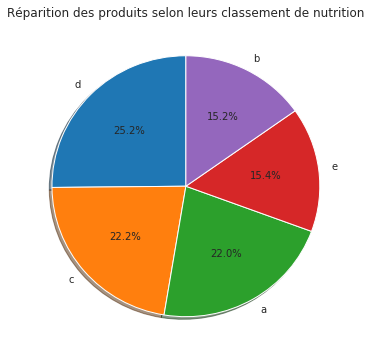

In [8]:
data_cl = data_c['nutrition_grade_fr'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
savefig("nutrition_grade.png")

pie(data_cl.values, labels=data_cl.index,
                autopct='%1.1f%%', shadow=True, startangle=90)
title('Réparition des produits selon leurs classement de nutrition')
show()

### 2.2 Distrubition par pays
On s'interesse à voir les pays qui produisent les plus en europe

In [9]:
pays_list = ['France','Belgium','United Kingdom', 'Switzerland']
europe = data_c[data_c['countries'].isin(pays_list)]


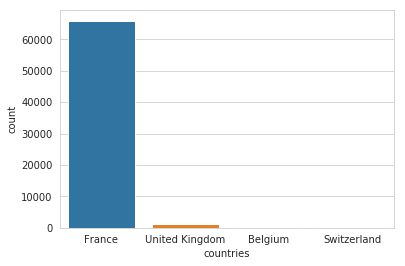

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="countries", data=europe)


La France représente le pays qui produise le plus en Europe 

## 3. Analyse multivariée

L'analyse effectué a pour objectif de voir la relation du score nutritionnel avec les composants principaux cités au dessus

In [11]:
def boxplot_multiv (feature,plotColor="#CC9900"):
  
    plt.figure(figsize=(15, 4)) 
    sns.set_style("whitegrid")

    sns.boxplot(data=data_c, x="nutrition_grade_fr",y=feature)

(0, 30)

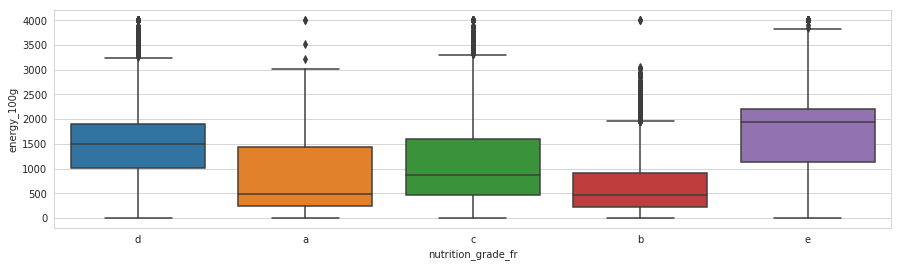

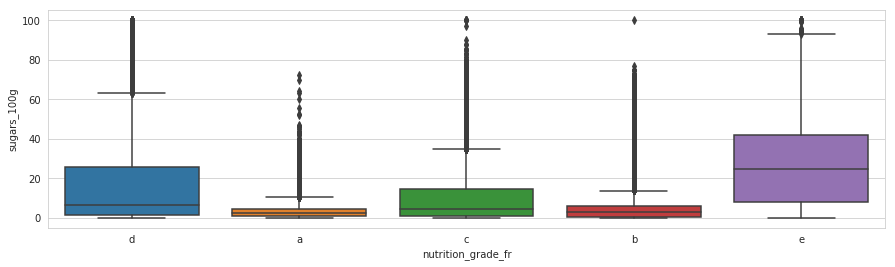

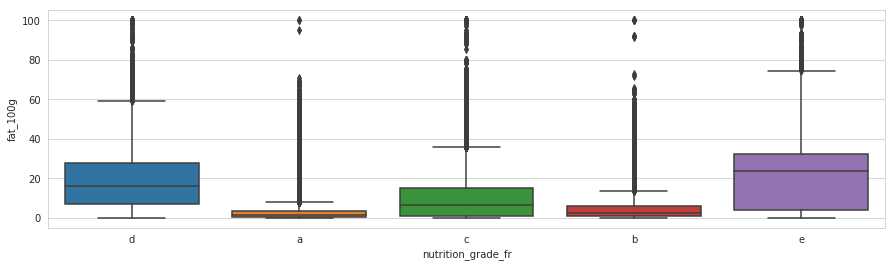

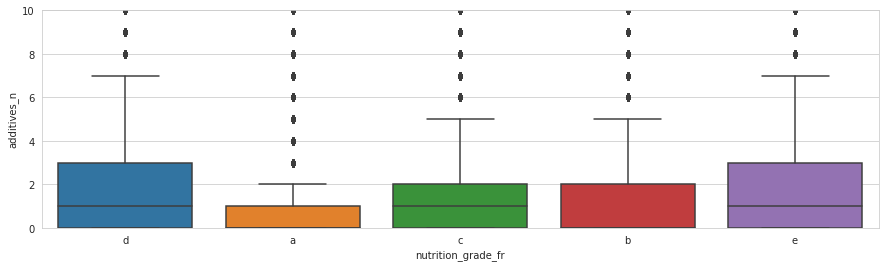

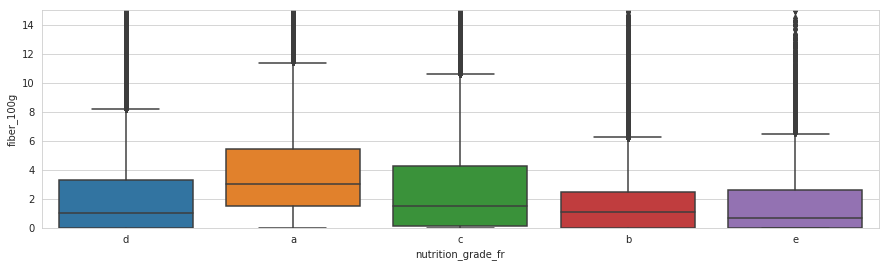

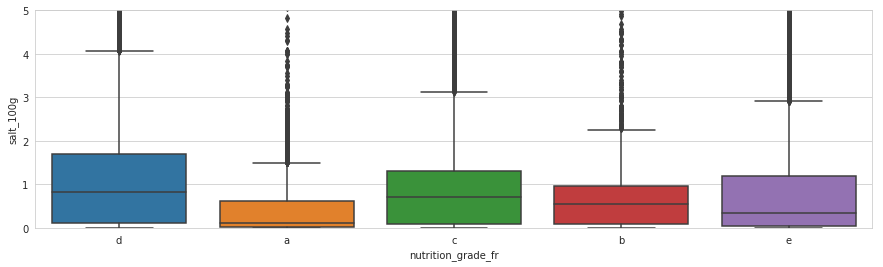

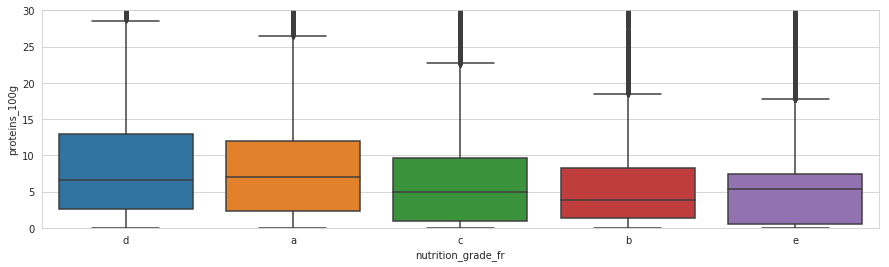

In [12]:
# bivariate boxplot
boxplot_multiv("energy_100g")
boxplot_multiv("sugars_100g","#33CCFF")
boxplot_multiv("fat_100g","yellow")
boxplot_multiv("additives_n","purple")
plt.ylim (0,10)
boxplot_multiv("fiber_100g","green")
plt.ylim (0,15)
boxplot_multiv("salt_100g","white")
plt.ylim (0,5)
boxplot_multiv("proteins_100g","red")
plt.ylim (0,30)


1-Les éléments de grade "E" et "D" contiennent des quantités remarquables du sucre, alors que ceux de grade "A" et "B" contiennent des quantités légéres

2-Pareil pour le gras, les élements de grade " A" et "B" contiennent moins de gras que les autres grades

3-Les proteins semblent existés dans tout les grades des éléments avec des quantités équivalentes, ceci dis qu'un élement mauvais ou bon pour la santé contient une quantité remarquable de proteins.

4-Les élements de grade "E","D","C" contiennent plus d'énérgie et calorie que ceux de grade "A" et "B"





### 3.1. La relation entre les differents élements

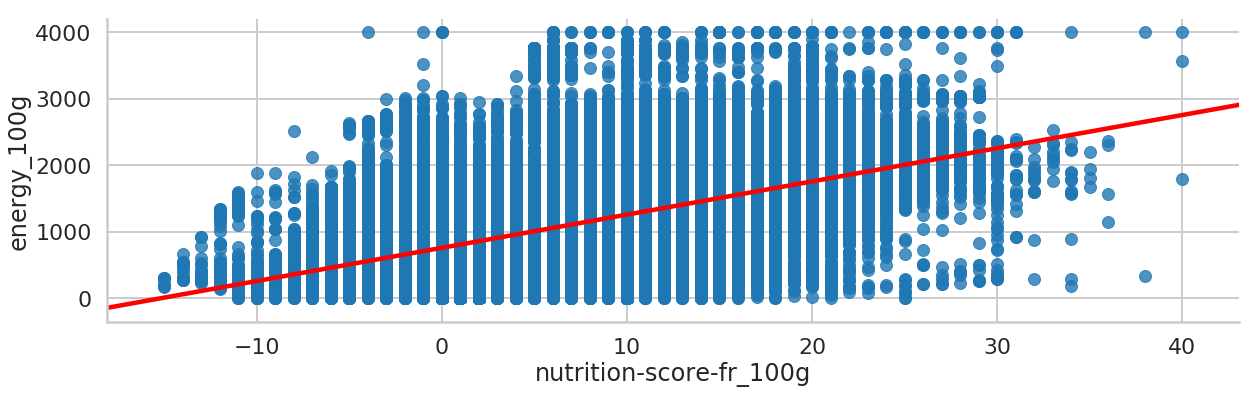

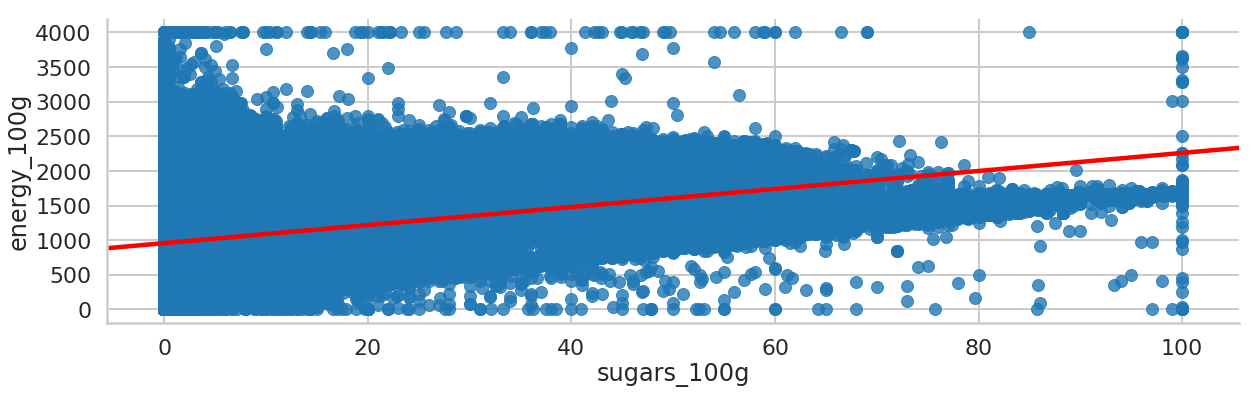

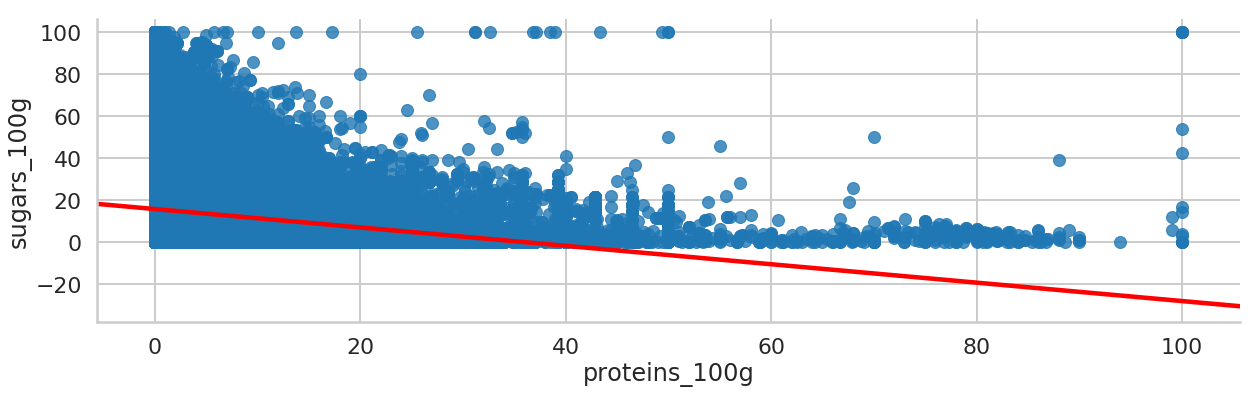

In [15]:
sns.set_style("whitegrid")

with sns.plotting_context(context='poster'):
    sns.lmplot("nutrition-score-fr_100g","energy_100g", data_c, line_kws={'color': 'red'}, size=6, aspect=3)
    sns.lmplot("sugars_100g","energy_100g", data_c, line_kws={'color': 'red'}, size=6, aspect=3)
    sns.lmplot("proteins_100g","sugars_100g", data_c, line_kws={'color': 'red'}, size=6, aspect=3)

1.On peut voir qu'il y'a une relation linéaire entre le sucre et l'energie, et entre l'energie et le gras, ce qui est tout a fait logique, l'élément qui contient de sucres sont généralement des élements energétiques, qui contiennent beaucoup de calories.

2.Par contre, le plus qu'il y'a du sucre dans l'élement, le moins de proteins y'en a.

Pour mieux visualiser et comprendre la relation entre les differents composants, j'ai construit la matrice de coorélation

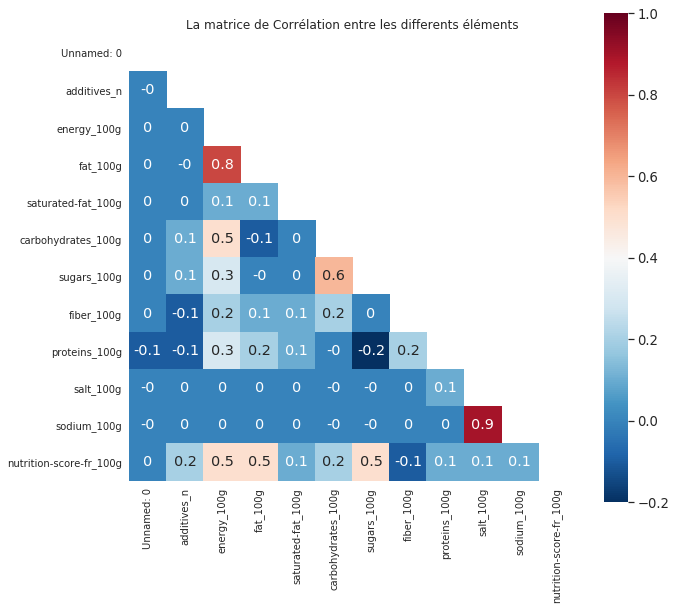

In [16]:
data_c.columns
corr = data_c.corr()
corr = corr.round(1)
plt.figure(figsize=(10, 9))
plt.title("La matrice de Corrélation entre les differents éléments")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.2)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1, cmap="RdBu_r",square=True, mask=mask)

Une forte coorélation entre :

1.Le Soduim et le Sel ( ce qui est logique, parce que le soduim entre dans les composant du sel - Chlorure de sodium )

2.Le Gras et l'Energie ainsi que les Carbohydrates et l'Energie

3.Le Sucre et les Carbohydrates

## 3. Application \\Features Engineering

Apres avoir fait des recherches sur internet et faire quelques analyses de coorélation entre les differents composants, j'ai pu construire trois features pour mieux définir une alimentation saine.

1.Deux feautres faites à partir de sommation des élements qui sont bien coorélés entre eux, un feature qui représente le taux d'éléments biens dans un produit, et l'autre représente le taux d'élements mauvais.

2.Un feature qui indique si le produit est bon ou mauvais pour la santé (et sur l'analyse des additifs nutritionnels), en comparant ces deux autres nouveaux features à la moyennes générale des deux features d'autres produits.

In [17]:
mauvaise_data_c = ( data_c["energy_100g"] + data_c["carbohydrates_100g"] +data_c["salt_100g"] +data_c["fat_100g"] +data_c["saturated-fat_100g"] +  data_c["sodium_100g"] + data_c["sugars_100g"] + data_c["additives_n"]  )
bon_data_c = (  data_c["fiber_100g"]+data_c["proteins_100g"] ) 

data_c["bon_data_c"] = bon_data_c 
data_c["mauv_data_c"] = mauvaise_data_c

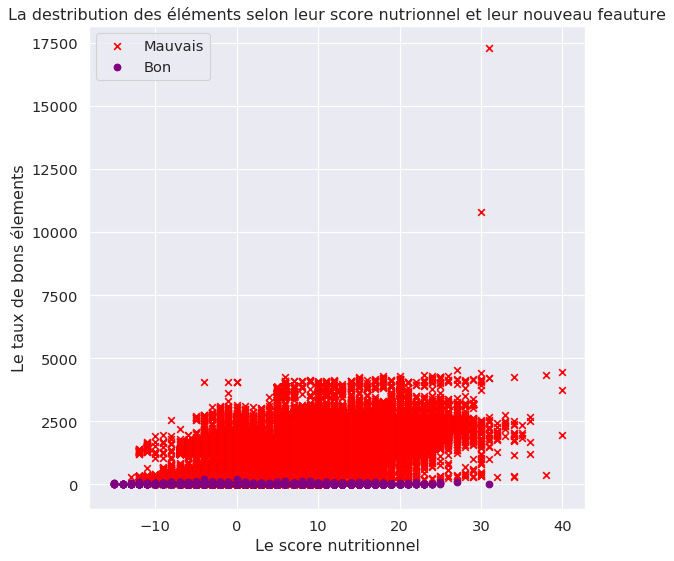

In [18]:
data_c['score'] = np.where(((data_c["mauv_data_c"]<data_c["mauv_data_c"].mean()) & (data_c["bon_data_c"]>data_c["bon_data_c"].mean())) , 'Bon', 'Mauvais')

plt.figure(figsize=(8, 8), dpi=80)

good = data_c[data_c["score"]=="Bon"]
bad = data_c[data_c["score"]=="Mauvais"]

b = plt.scatter(    bad["nutrition-score-fr_100g"],bad["mauv_data_c"], color='red',marker="x")
g = plt.scatter(   good["nutrition-score-fr_100g"],good["bon_data_c"], color='purple')

plt.title("La destribution des éléments selon leur score nutrionnel et leur nouveau feauture")
plt.xlabel("Le score nutritionnel")
plt.ylabel("Le taux de bons élements")
plt.legend([b,g], ['Mauvais','Bon'])

On peut voir une distinction entre les produits, une relation inverse entre le taux de bons éléments et le score nutritionnel.

Pour mieux comprendre le phénoméne, j'ai fait une petite matrice de coorélation entre les deux features crées et le score nutritionnel

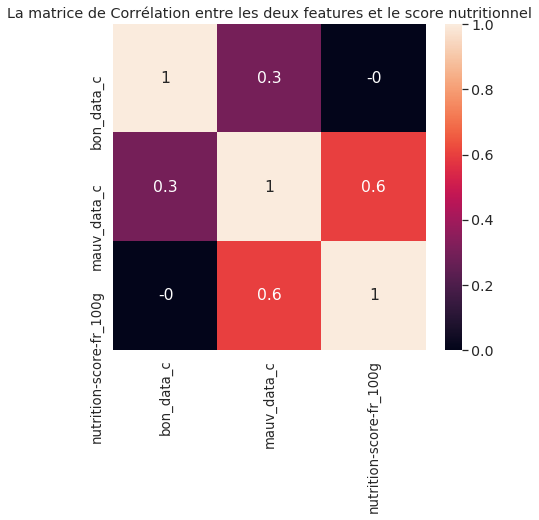

In [19]:
corr = data_c[["bon_data_c","mauv_data_c","nutrition-score-fr_100g"]].corr()
corr = corr.round(1)
plt.figure(figsize=(7, 6))
plt.title("La matrice de Corrélation entre les deux features et le score nutritionnel")

sns.set(font_scale=1.3)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1)

On peut voir qu'il y'a une forte coorélation entre le feature "Bon data nutritionnel" avec le score nutritionnel et le feature "Mauvaise data nutritionnel" avec le score nutritionnel.

Avant de poursuivre le travail, j'ai enlevé un échantillon de 10000 éléments qui vont être considérés comme des données de test



In [20]:
data_test = data_c.sample(10000)
data_c.columns

Index(['Unnamed: 0', 'product_name', 'countries', 'additives_n',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'bon_data_c',
       'mauv_data_c', 'score'],
      dtype='object')

## 4. La réduction dimenstionnelle 

On va préparer les donnnés pour la réduction dimensionnelle, en enlevant les données qui contient du text



In [21]:
add_nut = data_c["nutrition_grade_fr"]
resultat_nut = data_c["score"]

countr = data_c["countries"]
D = data_c.drop("nutrition_grade_fr",1)
D = D.drop("score",1)
D = D.drop("product_name",1)
D = D.drop("additives_n",1)
D = D.drop("countries",1)
D = D.drop("nutrition-score-fr_100g",1)
D = D.drop("Unnamed: 0",1)

### 4.1. La standarisation des données

In [22]:
std_scale = preprocessing.StandardScaler().fit(D)
addnut_scaled = std_scale.transform(D)

Pour la réduction dimensionnelle, on va utiliser PCA avec 8 composants

In [23]:
pca_add = decomposition.PCA(n_components=8)
pca_add.fit(addnut_scaled)
var = pca_add.explained_variance_ratio_
print("avec 7 composant on a pu expliqué ", var.sum()*100, "% de la variance")

avec 7 composant on a pu expliqué  99.68790791850543 % de la variance
